In [ ]:
"I. Classification"

'I. Classification'

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
#Load the digits dataset: digits
digits = datasets.load_digits()

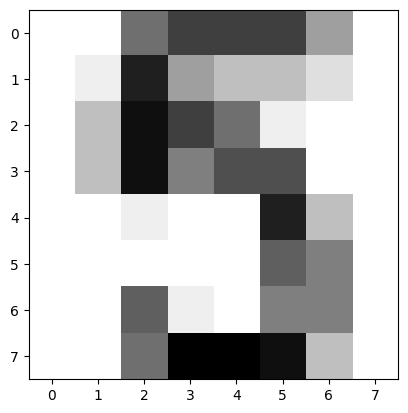

In [ ]:
# Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target
# Split into training and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
#Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)
#Fit the classifier to the training data
knn.fit(X_train, y_train)
#Print the accuracy
print("Accuracy: {0}". format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


In [ ]:
"Varying Number of Neighbours"

'Varying Number of Neighbours'

<function matplotlib.pyplot.show(close=None, block=None)>

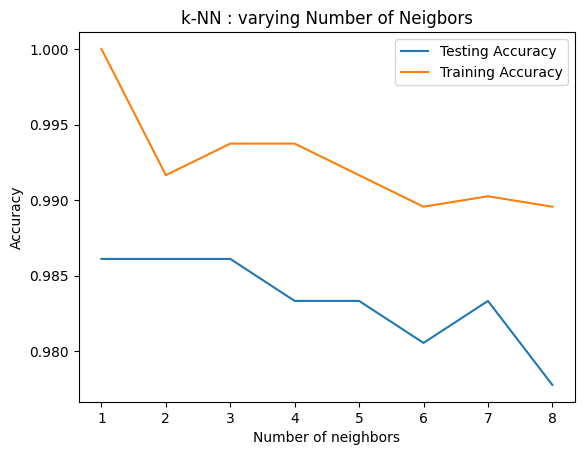

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
  #Setup a k-N Classifier with k neighbors: knn
  knn = KNeighborsClassifier(n_neighbors=k)
  # Fit the classifier to the training dat a
  knn.fit(X_train,y_train)
  #Compute accuracy on the training set
  train_accuracy[i] = knn.score(X_train, y_train)
  #Compute accuracy on the training set
  test_accuracy[i] = knn.score(X_test, y_test)
#Generate plot
plt.title('k-NN : varying Number of Neigbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show

In [ ]:
"Classification with deep learning"

'Classification with deep learning'

In [8]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [9]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train= True, download=True )

100%|██████████| 9912422/9912422 [00:00<00:00, 351428183.46it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 66122103.62it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 135149913.95it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13844861.02it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [10]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x7F4E11549AB0>, 5)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


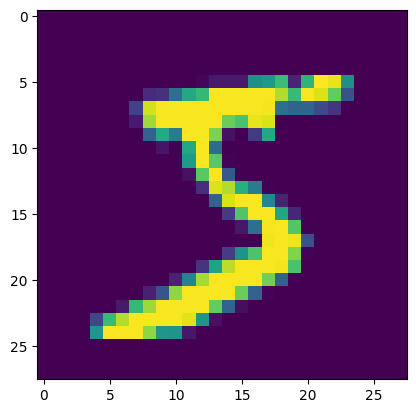

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [12]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fully = nn.Sequential(
        nn.Linear(28*28, 10)
    )
  def forward(self, x):
    x = x.view([-1,28*28])
    x = self.fully(x)
    x = F.log_softmax(x, dim=1)
    return x

In [13]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)                                                      

In [14]:
def train():
  learning_rate = le-3
  num_epochs = 3
  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
  for epoch in range(num_epochs):
     for batch_idx, (data, targer) in enumerate(train_loader):
       output = net(data)
       loss = F.nll_loss(output, target)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
       if batcj_isx % 100 == 0:
         print('Epoch = &f. Batcj= %s. Loss = %s' % (epoch, batch_isx, loss.item()))
  return net

In [15]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms
               .ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms
               .ToTensor()])), batch_size=1, shuffle=True)

In [21]:
def train():
  learning_rate = 1e-3
  num_epochs = 3

  net = Net()
  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

  for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      output = net(data)

      loss = F.nll_loss(output, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch_idx % 100 == 0:
        print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
        return net

In [23]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.331667423248291


In [27]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
  total += len(target)
  output = net(data)
  pred = output.max(1, keepdim=True)[1]
  correct += target.eq(pred.view_as(target)).sum()

In [28]:
#Linear Regression
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

<ipython-input-29-4976fa591727>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


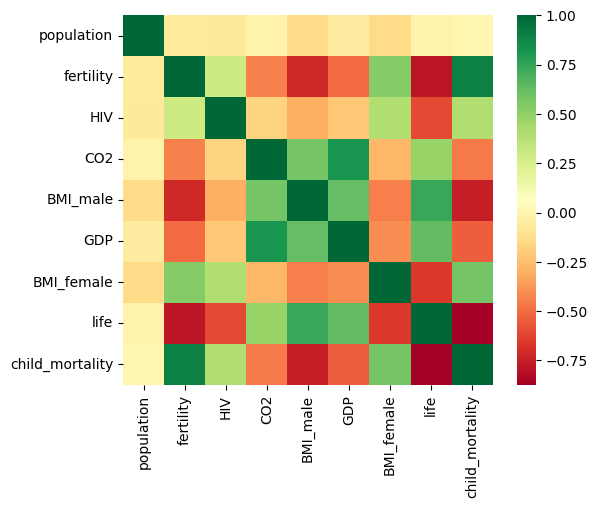

In [29]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151917


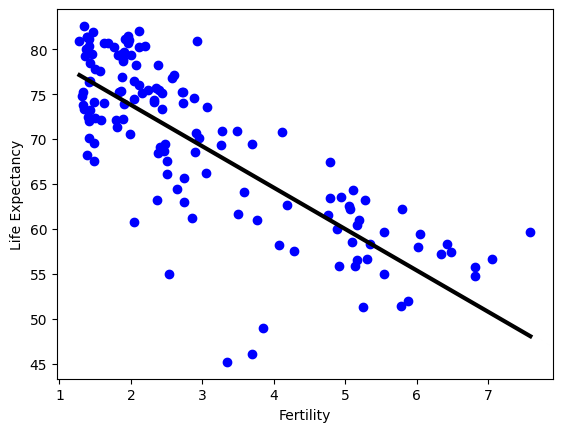

In [35]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)
#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

#Create the regression model: reg_all
reg= LinearRegression()

#Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#Print accuracy
print(reg.score(x_fertility, y_life))

#Plot regression line
plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [39]:
features = pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

#Create the regression model: rea_all
reg_all= LinearRegression()
#Fit the regression to the training data
reg_all.fit(x_train, y_train)

#Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793176


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

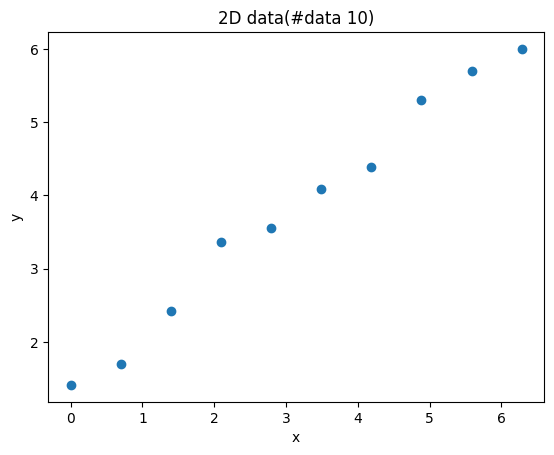

In [41]:
N = 10 # number of data points
m= .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c +np.random.normal(0,.3,x.shape)
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data(#data %d)' % N)
plt.show

In [42]:
import torch

In [49]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    sample = {
        'feature': torch.tensor([1,self.x[idx]]),
        'label': torch.tensor([self.y[idx]])
    }
    return sample

In [50]:
dataset = MyDataset(x,y)
for i in range(len(dataset)):
  sample = dataset[i]
  print (i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.4121], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.6935], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.4172], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.3625], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.5609], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.0824], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.3873], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.3102], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.6995], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.0017], dtype=torch.float64)


In [60]:
from torch.utils.data import DataLoader

dataset = MyDataset(x,y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [61]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
  print('\nbatch# = %s' % i_batch)
  print('samples: ')
  pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 4.8869],
        [1.0000, 4.1888],
        [1.0000, 3.4907]], dtype=torch.float64),
 'label': tensor([[3.3625],
        [5.3102],
        [4.3873],
        [4.0824]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 6.2832],
        [1.0000, 1.3963],
        [1.0000, 5.5851],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[6.0017],
        [2.4172],
        [5.6995],
        [3.5609]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 0.0000]], dtype=torch.float64),
 'label': tensor([[1.6935],
        [1.4121]], dtype=torch.float64)}


In [63]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel (nn.Module):
  def __init__(self, input_dim, output_dim):
    super(MyModel, self). __init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    out = self.linear(x)
    return out

In [64]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [65]:
cost = nn.MSELoss()

In [66]:
num_epochs = 10 #How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr= l_rate)

dataset = MyDataset(x,y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
  print('Epoch = %s' % epoch)
  for batch_i, samples in enumerate(training_sample_generator):
    predictions = model(samples['feature'])
    error = cost(predictions, samples['label'])
    print('\tBatch = %s, Error = %s' % (batch_i, error.item()))

    optimiser.zero_grad()
    error.backward()
    optimiser.step()


Epoch = 0


RuntimeError: ignored

In [67]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


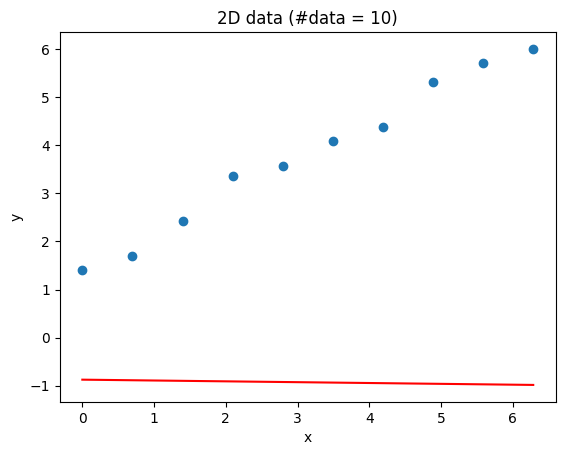

In [68]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [69]:
#IV Exercise
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# import iris dataset
iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [71]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [72]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [73]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')


training set size: 120 samples 
test set size: 30 samples


In [74]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [75]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

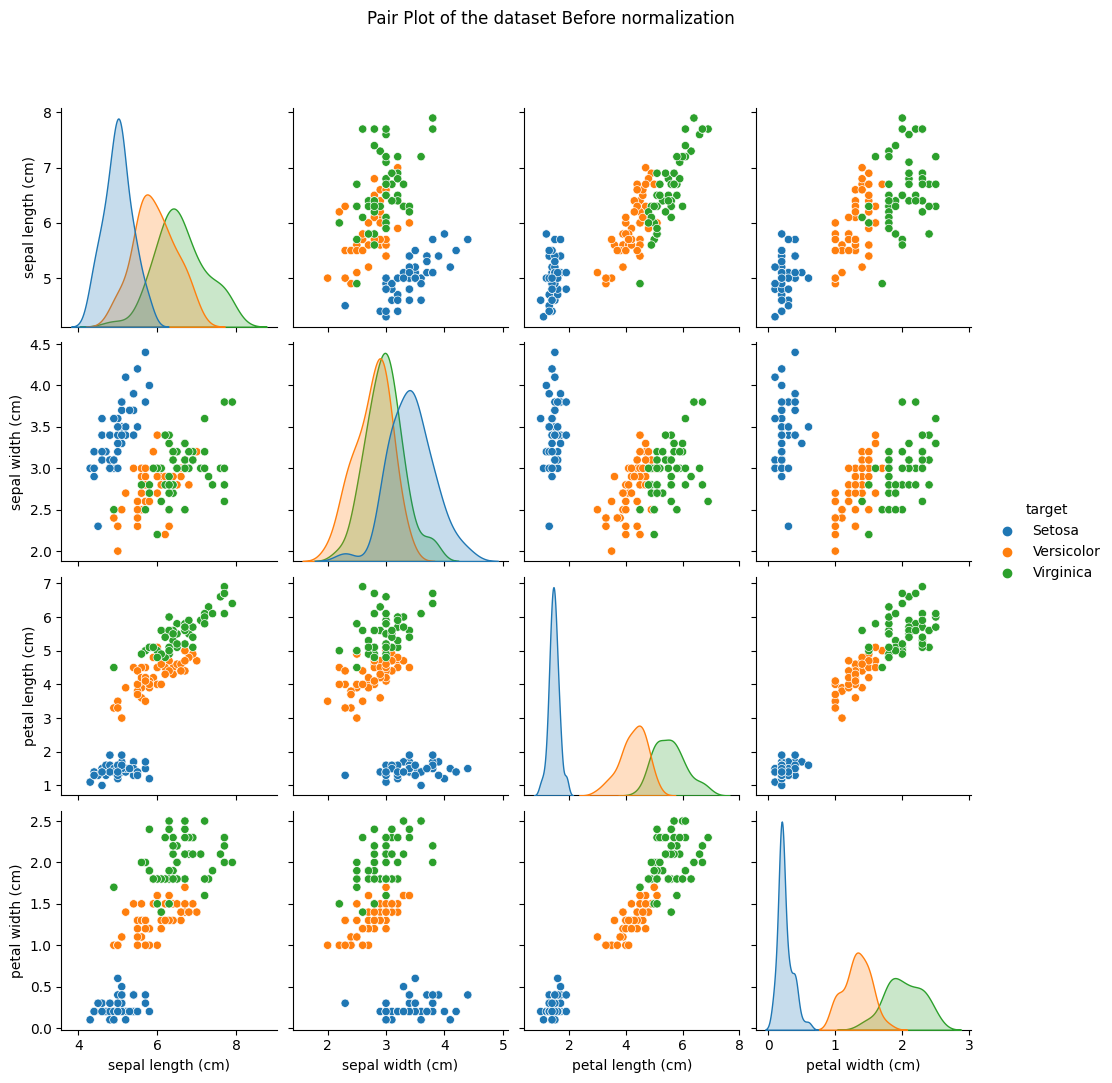

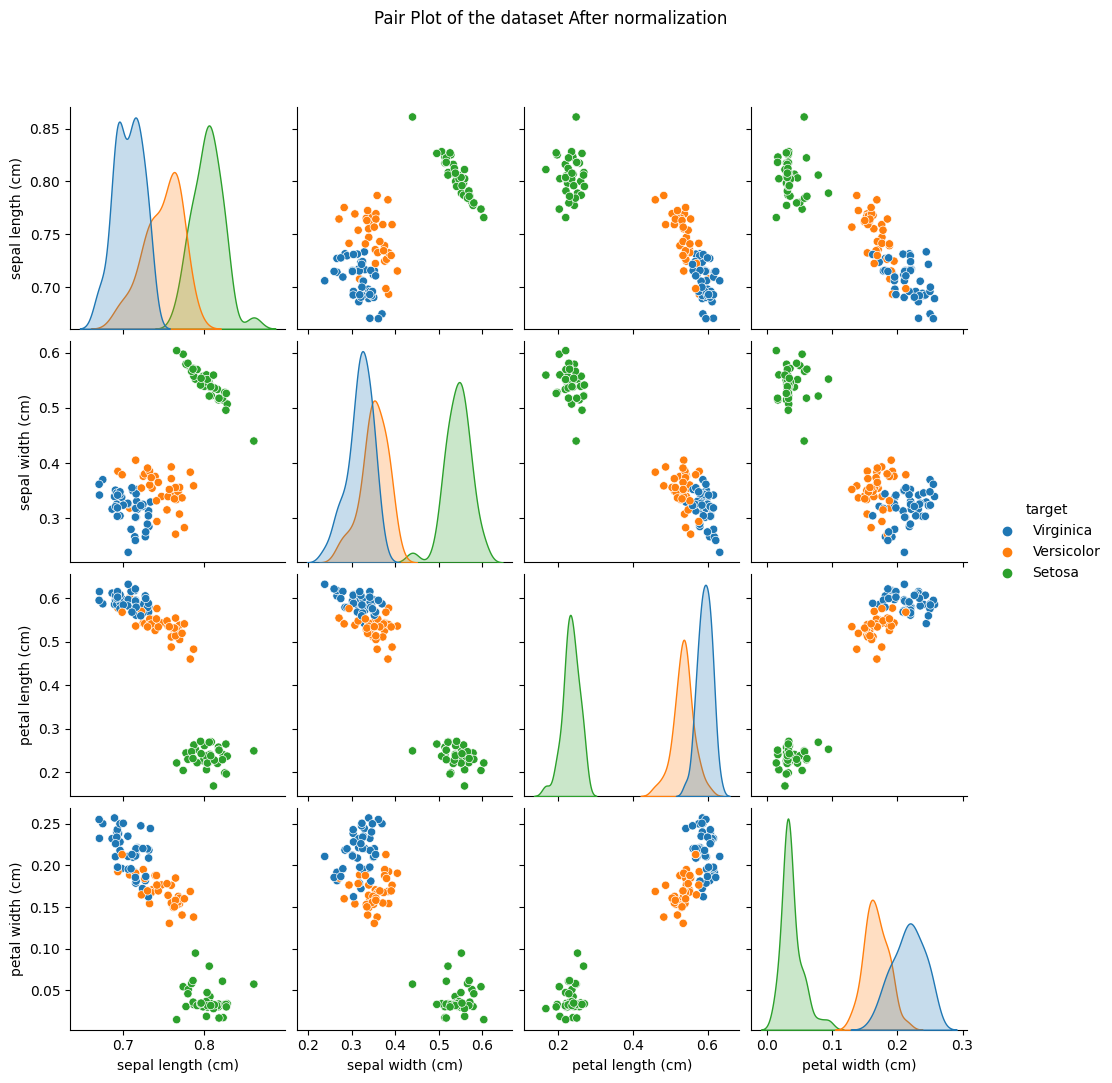

In [76]:
## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [79]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [80]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [84]:
# 2. Recommendation Systems
import pandas as pd
import numpy as np

# Read the movies.csv file
movies_df = pd.read_csv('movies.csv', encoding="ISO-8859-1")
# Read the users.csv file
users_df = pd.read_csv('users.csv', encoding="ISO-8859-1")
# Read the ratings.csv file
ratings_df = pd.read_csv('ratings.csv', encoding="ISO-8859-1")

In [85]:
# Find list of used genres which is used to category the movies.
movies_df['genres'] = movies_df['genres'].fillna('')

unique_genres = []
for genres in movies_df['genres'].str.split('|'):
    for genre in genres:
        if genre not in unique_genres:
            if genre != "":
                unique_genres.append(genre)
print(unique_genres)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical']


In [86]:
Ij = np.zeros((movies_df.shape[0], len(unique_genres)), dtype=int)
for i, genres in enumerate(movies_df['genres'].str.split('|')):
    for genre in genres:
        if (not isinstance(genre, str)) or (genre == '') or (genre not in unique_genres):
            continue
        j = unique_genres.index(genre)
        Ij[i, j] = 1

np.set_printoptions(formatter={'all': lambda x: f"{x}, "})
print(Ij[:4])

[[1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, ]
 [0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, ]
 [0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, ]
 [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, ]]


In [87]:
merged_df = pd.merge(ratings_df, movies_df, on='movie_id', how='left')

unique_genres = set('|'.join(merged_df['genres'].tolist()).split('|'))

genre_index_dict = {genre: i for i, genre in enumerate(unique_genres)}

num_users = ratings_df['user_id'].nunique()
Uj = np.zeros((num_users, len(unique_genres)), dtype=int)
for index, row in ratings_df.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    rating = row['rating']

    genres = merged_df.loc[merged_df['movie_id'] == movie_id]['genres'].tolist()[0].split('|')
    
    for genre in genres:
        j = genre_index_dict[genre]
        Uj[user_id-1, j] = 1
Uj = Uj[:, :-1]
print(Uj[:4])

[[1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]
 [1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]
 [1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]
 [1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, ]]


In [88]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(Uj, Ij)


print(cos_sim)

[[0.3086066999241839,  0.3086066999241839,  0.3779644730092272,  ...
  0.3779644730092272,  0.2672612419124244,  0.3779644730092272, ]
 [0.4629100498862758,  0.4629100498862758,  0.1889822365046136,  ...
  0.3779644730092272,  0.2672612419124244,  0.3779644730092272, ]
 [0.4472135954999579,  0.4472135954999579,  0.36514837167011066,  ...
  0.36514837167011066,  0.2581988897471611,  0.36514837167011066, ]
 ...
 [0.4629100498862758,  0.4629100498862758,  0.1889822365046136,  ...
  0.3779644730092272,  0.2672612419124244,  0.3779644730092272, ]
 [0.4472135954999579,  0.4472135954999579,  0.36514837167011066,  ...
  0.36514837167011066,  0.2581988897471611,  0.36514837167011066, ]
 [0.4472135954999579,  0.4472135954999579,  0.36514837167011066,  ...
  0.36514837167011066,  0.2581988897471611,  0.36514837167011066, ]]


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np

# Load the data
ratings = pd.read_csv('ratings.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.5)

# Create user-item matrices for training and testing data
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# Calculate user similarity
user_correlation = 1 - pairwise_distances(train_data_matrix, metric='cosine')

# Replace NaN values with 0 and set diagonal values to 0
np.fill_diagonal(user_correlation, 0)
user_correlation[np.isnan(user_correlation)] = 0

print(user_correlation)

[[0.0,  0.33575624595668585,  0.28106245970936694,  ...
  0.2153381323709297,  0.2034952471862812,  0.31015496618890037, ]
 [0.33575624595668585,  0.0,  0.2533432866098224,  ...
  0.4692776391389166,  0.31018991899144654,  0.2518586311283151, ]
 [0.28106245970936694,  0.2533432866098224,  0.0,  ...
  0.2775740467245984,  0.3629277974354801,  0.19612648290946888, ]
 ...
 [0.2153381323709297,  0.4692776391389166,  0.2775740467245984,  ...
  0.0,  0.36637143987150833,  0.12877545001282775, ]
 [0.2034952471862812,  0.31018991899144654,  0.3629277974354801,  ...
  0.36637143987150833,  0.0,  0.30274900153229667, ]
 [0.31015496618890037,  0.2518586311283151,  0.19612648290946888,  ...
  0.12877545001282775,  0.30274900153229667,  0.0, ]]


In [90]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings_df, test_size=0.5)
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64').fillna(0)

from scipy.spatial.distance import correlation

def calculate_user_correlation(train_data_matrix):
   
    user_correlation = 1 - pairwise_distances(train_data_matrix.values, metric='correlation')
    np.fill_diagonal(user_correlation, 0) # Set the diagonal values to 0 to avoid recommending the same item
    return user_correlation

user_correlation = calculate_user_correlation(train_data_matrix)

print(user_correlation)

[[0.0,  -0.10915826016004715,  0.01752425011584402,  ...
  0.08367976130458721,  0.010205751096913351,  0.08994102753918487, ]
 [-0.10915826016004715,  0.0,  -0.005406635255291281,  ...
  0.012401163030094087,  0.044529880537909294,  -0.07380058828488889, ]
 [0.01752425011584402,  -0.005406635255291281,  0.0,  ...
  0.11370739233688543,  -0.09440894791964949,  -0.11531576496856366, ]
 ...
 [0.08367976130458721,  0.012401163030094087,  0.11370739233688543,  ...
  0.0,  0.04044189686530808,  -0.05097211552678216, ]
 [0.010205751096913351,  0.044529880537909294,  -0.09440894791964949,
  ... 0.04044189686530808,  0.0,  0.02454594190284154, ]
 [0.08994102753918487,  -0.07380058828488889,  -0.11531576496856366,  ...
  -0.05097211552678216,  0.02454594190284154,  0.0, ]]


In [91]:
def predict_user_based(user_correlation, train_data_matrix, user_id, item_id, k=10):
    # Calculate the mean rating for each user in the training dataset
    mean_user_rating = train_data_matrix.mean(axis=1)

    # Calculate the similarity between the active user and all other users
    sim_scores = user_correlation[user_id-1]

    # Select the top k most similar users
    top_similar_users = sim_scores.argsort()[::-1][1:k+1]

    # Calculate the weighted average of the ratings given by the k neighbors to the item
    item_ratings = train_data_matrix.loc[:, item_id]
    item_ratings = item_ratings[top_similar_users]
    sim_scores = sim_scores[top_similar_users]
    predicted_rating = np.dot(item_ratings, sim_scores) / sim_scores.sum()

    # Normalize the predicted rating by adding the mean rating of the active user
    predicted_rating += mean_user_rating[user_id]
    return predicted_rating